In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d01dee4169709e4462f152bd55dd0929


In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | katherine
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | jiexiu
Processing Record 10 of Set 1 | odweyne
Processing Record 11 of Set 1 | keta
Processing Record 12 of Set 1 | minna
Processing Record 13 of Set 1 | fengzhen
Processing Record 14 of Set 1 | thinadhoo
Processing Record 15 of Set 1 | poum
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | ankola
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | mareeba
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | hassleholm
Processing Record 23 of Set 1 | albany
Processing Recor

Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | nemencine
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | aksarka
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | marabba
Processing Record 50 of Set 4 | codrington
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | kahului
Processing Record 3 of Set 5 | vredendal
Processing Record 4 of Set 5 | rocha
Processing Record 5 of Set 5 | kununurra
Processing Record 6 of Set 5 | vallenar
Processing Record 7 of Set 5 | sorong
Processing Record 8 of Set 5 | hauterive
Processing Record 9 of Set 5 | chokurdakh
Processing Record 10 of Set 5 | sur
Processing Record 11 of Set 5 | sataua
City not found. Skipping...
Processing Record 12 of Set 5 | burnie
Processing Record 13 of Set 5 | conceicao do araguaia
Processing Record 14 of Set 5 | mys shmidta
City not found. Skipping...

Processing Record 29 of Set 8 | troitsko-pechorsk
Processing Record 30 of Set 8 | karpogory
Processing Record 31 of Set 8 | cochrane
Processing Record 32 of Set 8 | half moon bay
Processing Record 33 of Set 8 | buchanan
Processing Record 34 of Set 8 | cabo rojo
Processing Record 35 of Set 8 | verkhovazhye
Processing Record 36 of Set 8 | garissa
Processing Record 37 of Set 8 | coon rapids
Processing Record 38 of Set 8 | haapu
City not found. Skipping...
Processing Record 39 of Set 8 | cururupu
Processing Record 40 of Set 8 | maragogi
Processing Record 41 of Set 8 | hamilton
Processing Record 42 of Set 8 | habiganj
Processing Record 43 of Set 8 | mahbubabad
Processing Record 44 of Set 8 | kabelvag
Processing Record 45 of Set 8 | saiha
Processing Record 46 of Set 8 | fonte boa
Processing Record 47 of Set 8 | college
Processing Record 48 of Set 8 | nantucket
Processing Record 49 of Set 8 | khonuu
City not found. Skipping...
Processing Record 50 of Set 8 | mogadouro
Processing Record 1 of S

Processing Record 15 of Set 12 | mpraeso
Processing Record 16 of Set 12 | port-gentil
Processing Record 17 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 18 of Set 12 | shingu
Processing Record 19 of Set 12 | anloga
Processing Record 20 of Set 12 | siguiri
Processing Record 21 of Set 12 | lamu
Processing Record 22 of Set 12 | pontianak
Processing Record 23 of Set 12 | sucua
Processing Record 24 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 12 | lavrentiya
Processing Record 26 of Set 12 | daxian
City not found. Skipping...
Processing Record 27 of Set 12 | palmer
Processing Record 28 of Set 12 | buariki
City not found. Skipping...
Processing Record 29 of Set 12 | renningen
Processing Record 30 of Set 12 | madang
Processing Record 31 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 32 of Set 12 | daoukro
Processing Record 33 of Set 12 | anjiang
Processing Record 34 of Set 12 | broken hill
Processing Record 35 of S

In [9]:
len(city_data)

557

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katherine,-14.4667,132.2667,86.00,70,98,4.61,AU,2021-01-08 00:31:14
1,Rikitea,-23.1203,-134.9692,78.66,68,88,3.83,PF,2021-01-08 00:31:14
2,Qaanaaq,77.4840,-69.3632,-13.38,72,100,8.97,GL,2021-01-08 00:31:14
3,Chuy,-33.6971,-53.4616,66.74,87,0,3.33,UY,2021-01-08 00:31:14
4,Punta Arenas,-53.1500,-70.9167,50.00,81,75,11.50,CL,2021-01-08 00:31:14
5,Fortuna,40.5982,-124.1573,55.00,62,1,10.36,US,2021-01-08 00:31:14
6,Jiexiu,37.0244,111.9125,10.67,56,0,10.60,CN,2021-01-08 00:31:15
7,Odweyne,9.4092,45.0640,59.56,38,85,14.09,SO,2021-01-08 00:31:15
8,Keta,5.9179,0.9879,80.60,89,20,8.05,GH,2021-01-08 00:31:06
9,Minna,9.6139,6.5569,78.80,29,0,4.61,NG,2021-01-08 00:31:15


In [11]:
# reorder the columns
new_column_ord = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_ord]

city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katherine,AU,2021-01-08 00:31:14,-14.4667,132.2667,86.00,70,98,4.61
1,Rikitea,PF,2021-01-08 00:31:14,-23.1203,-134.9692,78.66,68,88,3.83
2,Qaanaaq,GL,2021-01-08 00:31:14,77.4840,-69.3632,-13.38,72,100,8.97
3,Chuy,UY,2021-01-08 00:31:14,-33.6971,-53.4616,66.74,87,0,3.33
4,Punta Arenas,CL,2021-01-08 00:31:14,-53.1500,-70.9167,50.00,81,75,11.50
5,Fortuna,US,2021-01-08 00:31:14,40.5982,-124.1573,55.00,62,1,10.36
6,Jiexiu,CN,2021-01-08 00:31:15,37.0244,111.9125,10.67,56,0,10.60
7,Odweyne,SO,2021-01-08 00:31:15,9.4092,45.0640,59.56,38,85,14.09
8,Keta,GH,2021-01-08 00:31:06,5.9179,0.9879,80.60,89,20,8.05
9,Minna,NG,2021-01-08 00:31:15,9.6139,6.5569,78.80,29,0,4.61


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

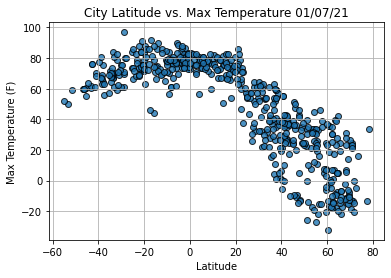

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

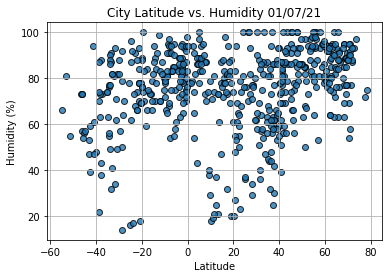

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

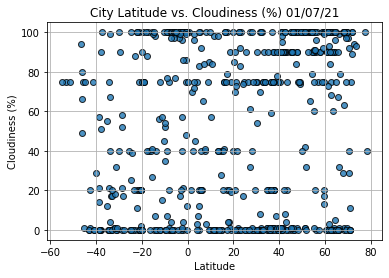

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

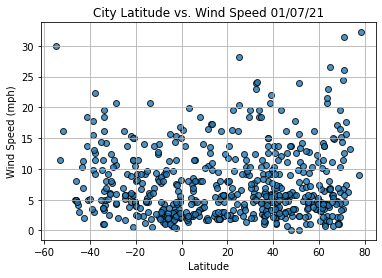

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                       Kodiak
Country                        US
Date          2021-01-08 00:31:16
Lat                         57.79
Lng                      -152.407
Max Temp                     39.2
Humidity                       93
Cloudiness                     90
Wind Speed                  16.11
Name: 13, dtype: object

In [43]:
city_data_df["Lat"]>=0


0      False
1      False
2       True
3      False
4      False
       ...  
552    False
553     True
554    False
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [44]:
# Create North/South Hemishphere DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

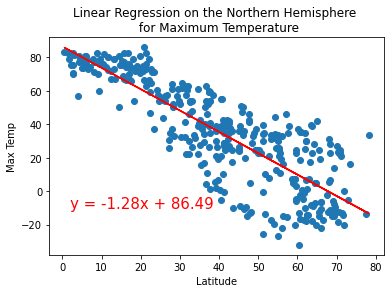

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(2,-10))


In [46]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Qaanaaq,GL,2021-01-08 00:31:14,77.4840,-69.3632,-13.38,72,100,8.97
5,Fortuna,US,2021-01-08 00:31:14,40.5982,-124.1573,55.00,62,1,10.36
6,Jiexiu,CN,2021-01-08 00:31:15,37.0244,111.9125,10.67,56,0,10.60
7,Odweyne,SO,2021-01-08 00:31:15,9.4092,45.0640,59.56,38,85,14.09
8,Keta,GH,2021-01-08 00:31:06,5.9179,0.9879,80.60,89,20,8.05


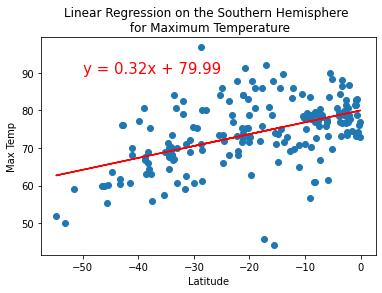

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

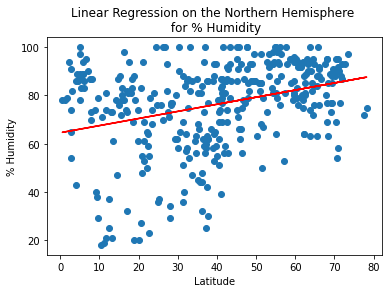

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

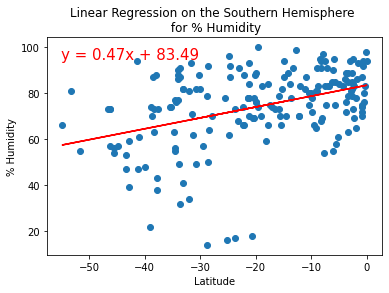

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,95))

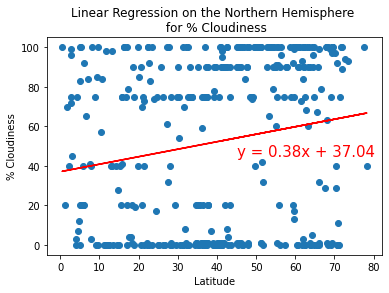

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,45))

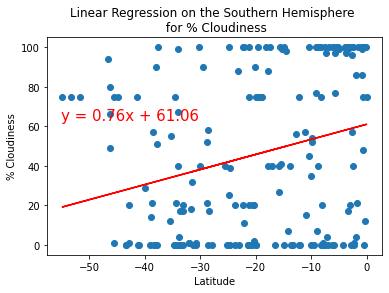

In [51]:
# Linear regression on the South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,63))

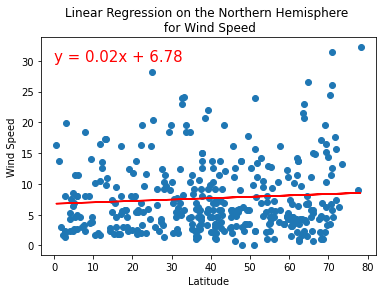

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

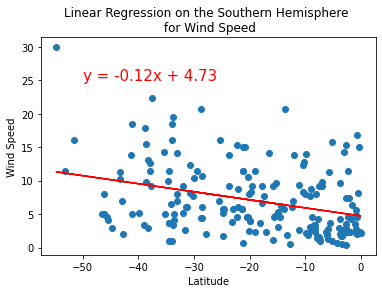

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))